<a href="https://colab.research.google.com/github/Lee-Sang-A/AI-Programming/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D%2011%EC%A3%BC%EC%B0%A8%20%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8912 - loss: 0.3838
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9717 - loss: 0.0957
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9803 - loss: 0.0624
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9869 - loss: 0.0427
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9906 - loss: 0.0309
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9934 - loss: 0.0217
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9941 - loss: 0.0181
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9953 - loss: 0.0141
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9969 - loss: 0.0100
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9968 - loss: 0.0097
테스트 정확도: 0.9787999987602234


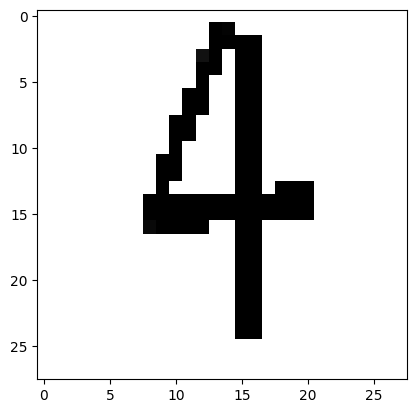

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
예측된 숫자: 2


In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np

# MNIST 데이터셋 로드 및 모델 정의
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 데이터 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

# 모델 학습
model.fit(train_images, train_labels, epochs=10, verbose=1)

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print("테스트 정확도:", test_acc)

# 손글씨 숫자 4 이미지 로드 및 전처리
img = cv2.imread('/num4img.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))  # 28x28 사이즈로 조정
img = img / 255.0  # 정규화
plt.imshow(img, cmap='gray')
plt.show()

# 차원 추가 및 예측
pred = model.predict(img[np.newaxis, :, :])
predicted_label = pred.argmax()
print("예측된 숫자:", predicted_label)

# 매우 많은 시도를 했지만 직접 그린 숫자4를 2나 5또는 7로 인식하고 4로 인식에 성공하지 못했습니다.
# 잘못 예측하는 이유는 아래와 같이 예상합니다.
# 1. 데이터셋의 훈련 부족
# 모델이 충분히 훈련되지 않았거나, 손글씨 숫자 4에 대한 데이터가 부족할 수 있습니다.
# 2. 손글씨의 스타일
# 손글씨의 스타일이 모델이 훈련된 스타일과 다를 경우, 모델이 잘못 인식할 수 있습니다.
# 3. 모델의 한계
# 기본적인 신경망 모델이 복잡한 패턴을 잘 인식하지 못할 수 있습니다.